# Plotter Notebook
This notebook seamlessly plots data gathered from training runs done on the GPU.

In [2]:
import glob
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

### File Parsing Function

In [3]:
def readfiles(files):
    params = [filename.replace("data/GPU_training_mae\\", "").replace("data/GPU_training_mse\\", "").replace("data_mae/GPU_training_mae/", "").replace("data_mae/GPU_training_mse/", "").replace("_TRAIN.csv", "").replace("_VAL.csv", "").split('_') for filename in files]
    filedumps = [np.genfromtxt(filename, delimiter=',') for filename in files]
    return filedumps, params

### Plot Specific Data

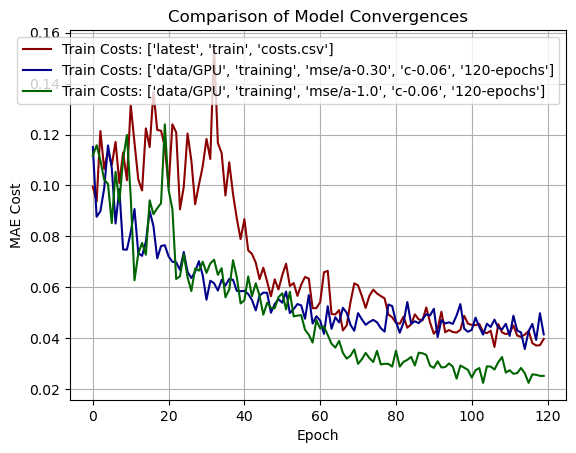

In [6]:
# Train Costs
TRAIN_FILES = ["latest_train_costs.csv", "data/GPU_training_mse/a-0.30_c-0.06_120-epochs_TRAIN.csv", "data/GPU_training_mse/a-1.0_c-0.06_120-epochs_TRAIN.csv"]
VAL_FILES = []
# Val Costs
train_costs, train_params = readfiles(TRAIN_FILES)
val_costs, val_params = readfiles(VAL_FILES)
# Plot
colours = ['darkred', 'darkblue', 'darkgreen']
for i, (train_cost, labels) in enumerate(zip(train_costs, train_params)):
    plt.plot(train_cost, color=colours[i] , label=f"Train Costs: {labels}")

for i, (val_cost, labels) in enumerate(zip(val_costs, val_params)):
    plt.plot(val_cost, linestyle="--", color=colours[i], label=f"Val Costs: {labels}")

plt.xlabel("Epoch")
plt.ylabel("MAE Cost")
plt.title(f"Comparison of Model Convergences")
plt.legend()
plt.grid()
plt.show()

### Plot All Data (MAE)

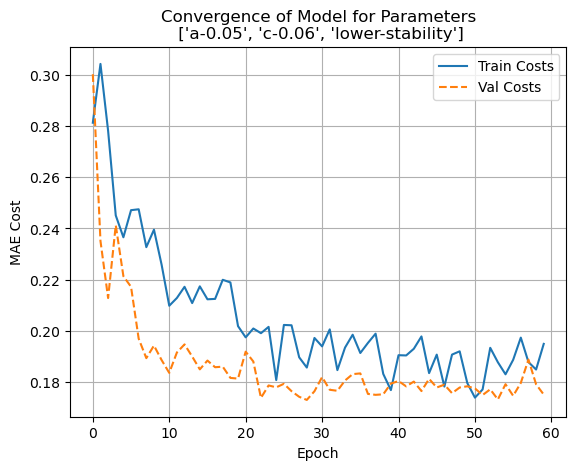

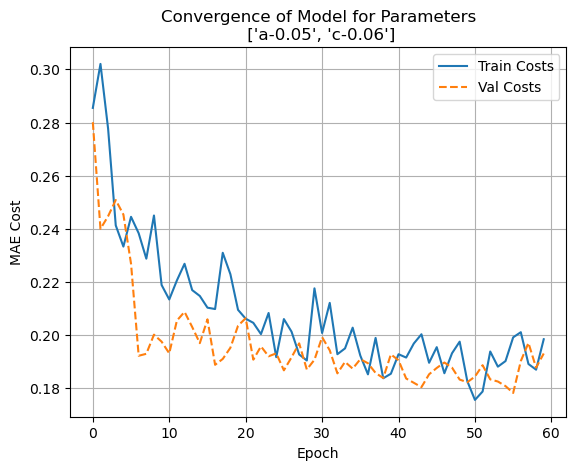

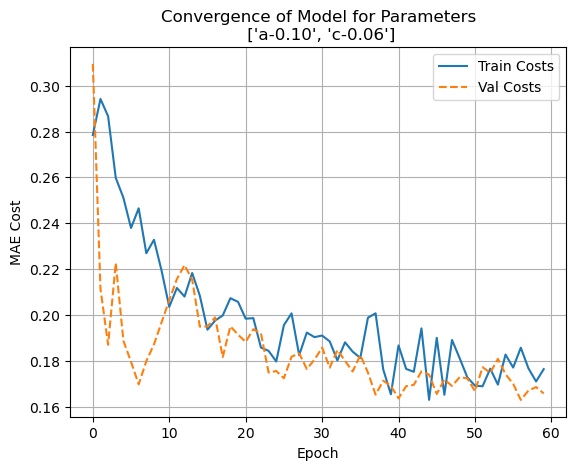

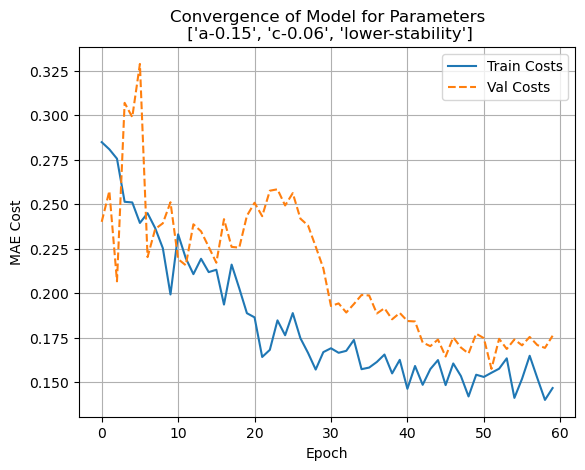

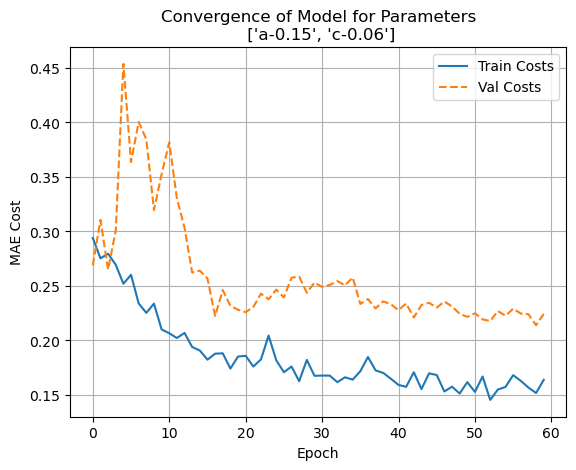

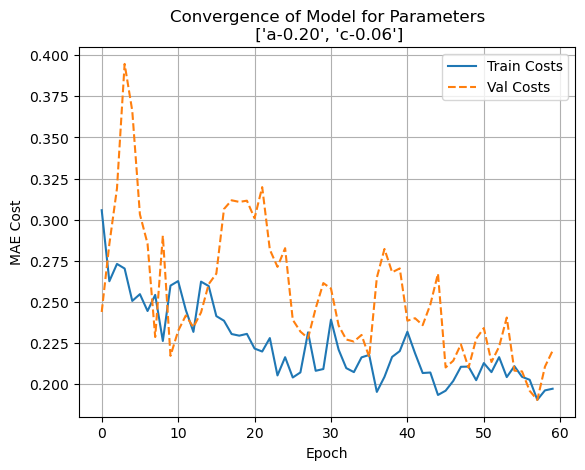

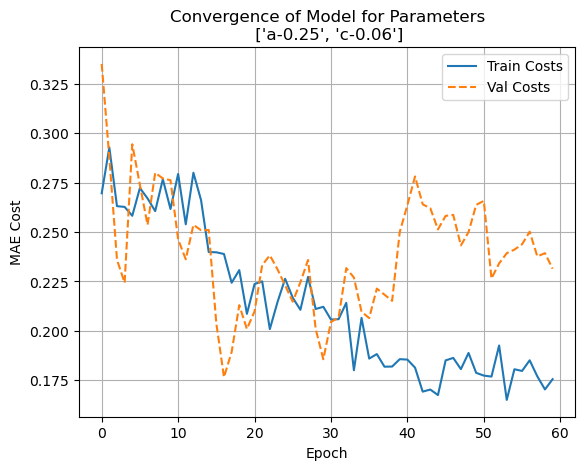

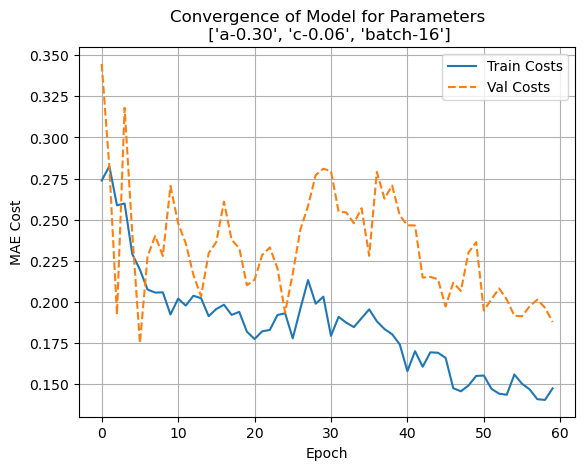

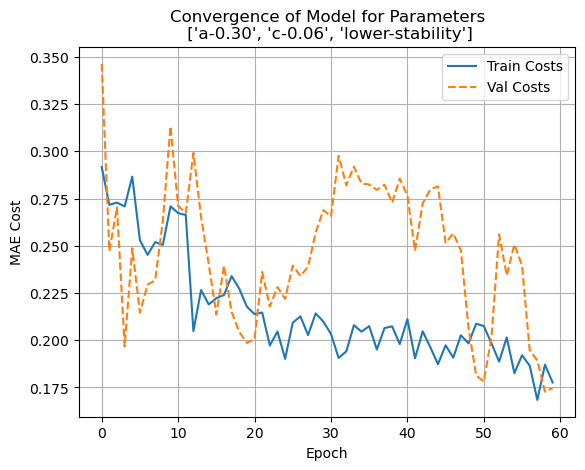

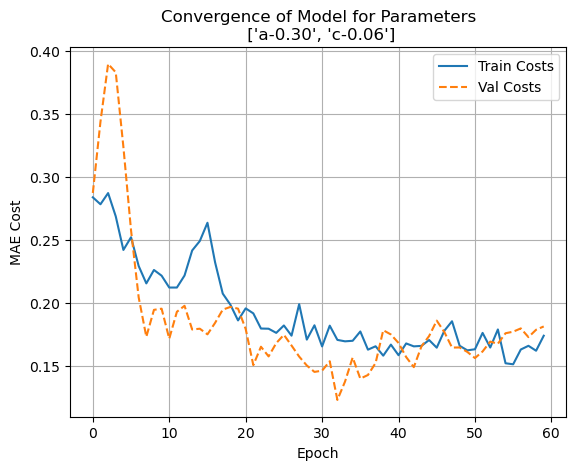

In [6]:
# Train Costs
train_files = glob.glob("data/GPU_training_mae/*TRAIN.csv")
train_costs, train_params = readfiles(train_files)
# Val Costs
val_files = glob.glob("data/GPU_training_mae/*VAL.csv")
val_costs, val_params = readfiles(val_files)
# Plot
for train_cost, val_cost, labels in zip(train_costs, val_costs, train_params,):
    fig, ax = plt.subplots(1)
    ax.plot(train_cost, label=f"Train Costs")
    ax.plot(val_cost, linestyle="--", label=f"Val Costs")
    ax.set_xlabel("Epoch")
    ax.set_ylabel("MAE Cost")
    ax.set_title(f"Convergence of Model for Parameters\n {labels}")
    plt.grid()
    plt.legend()
plt.show()

### Plot All Data (MSE)

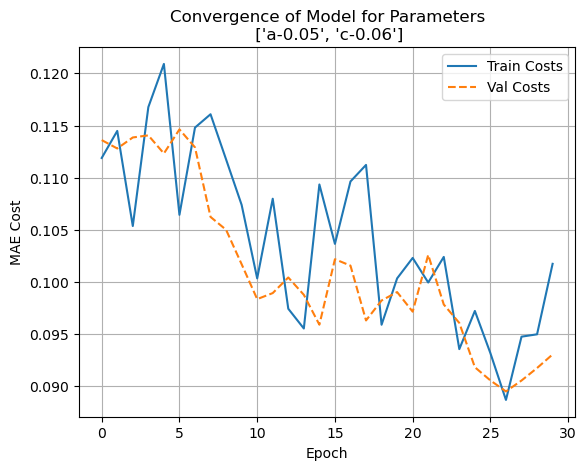

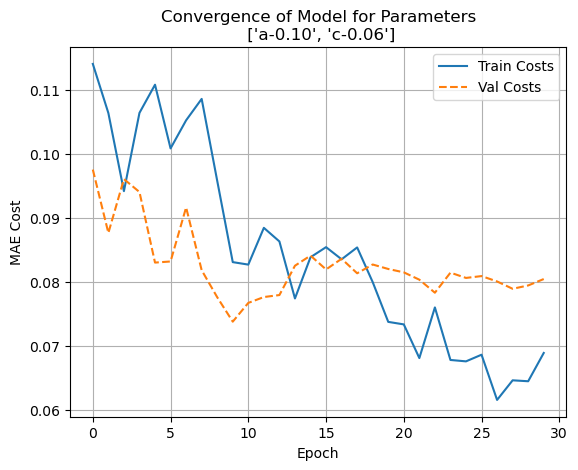

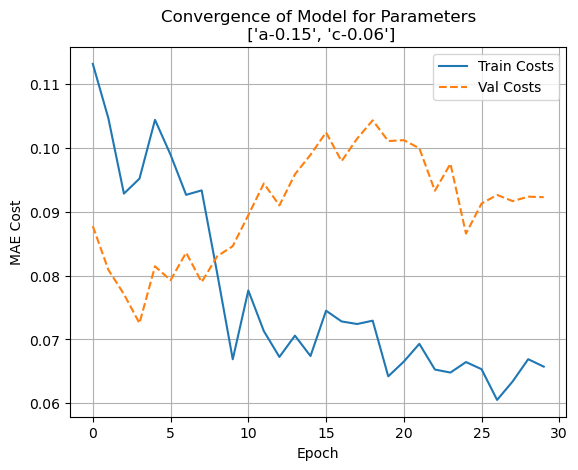

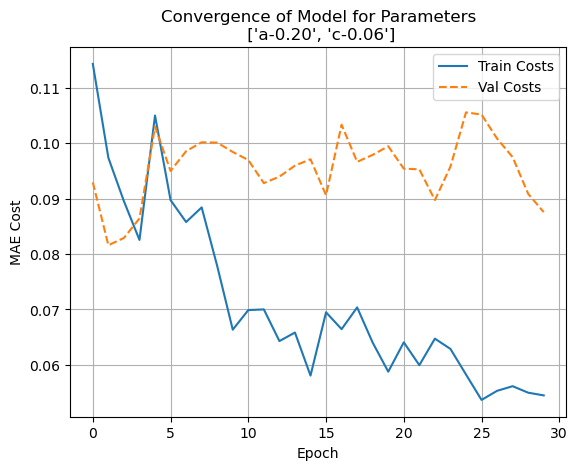

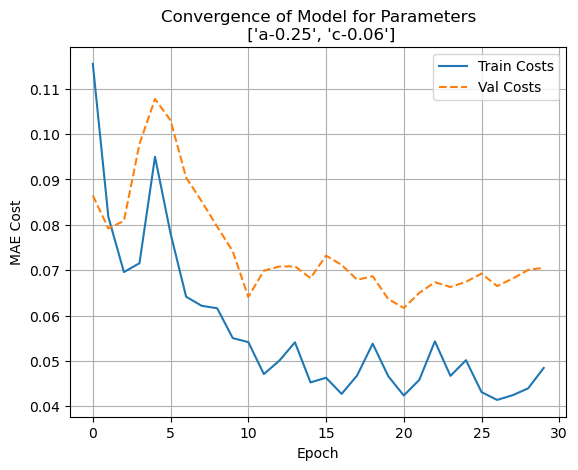

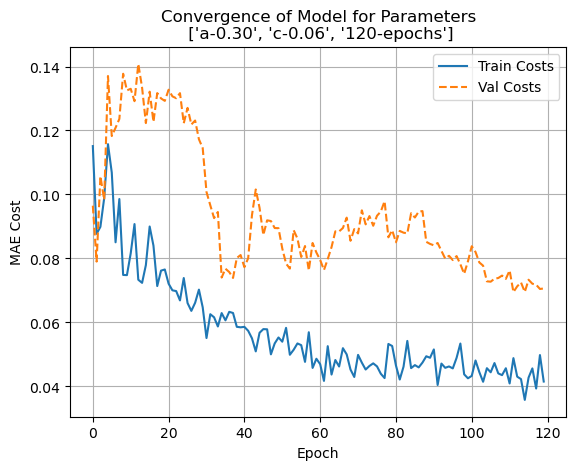

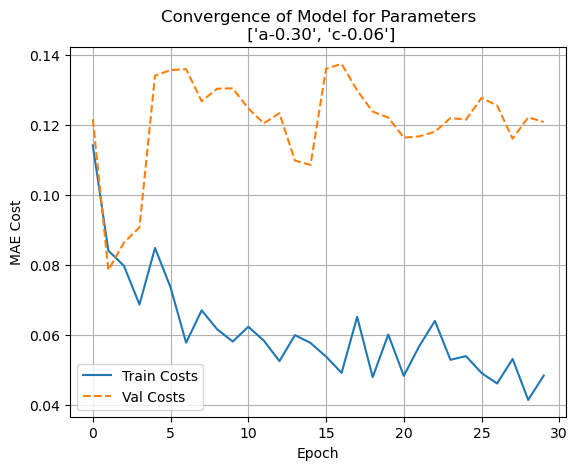

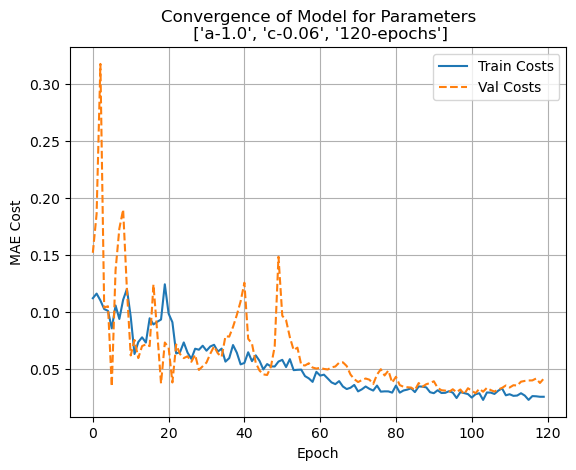

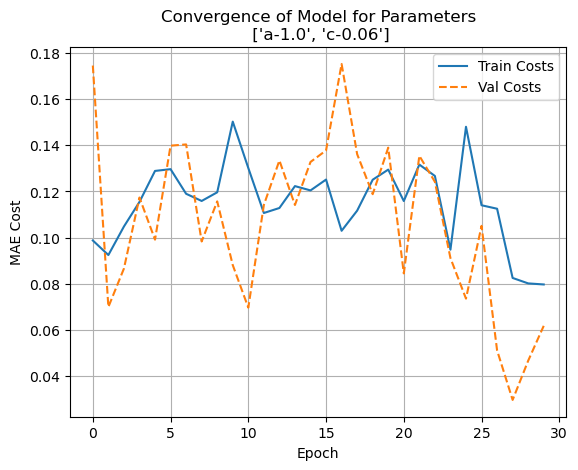

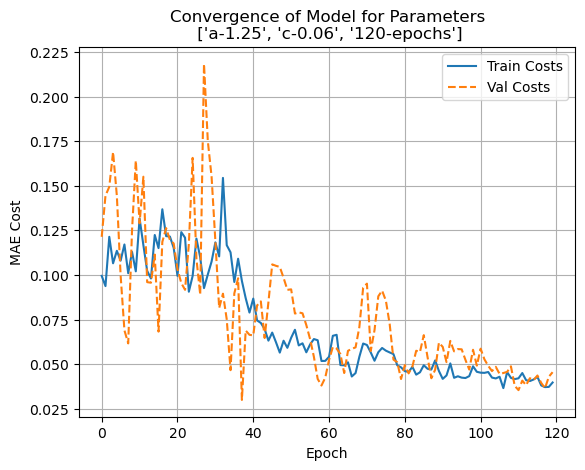

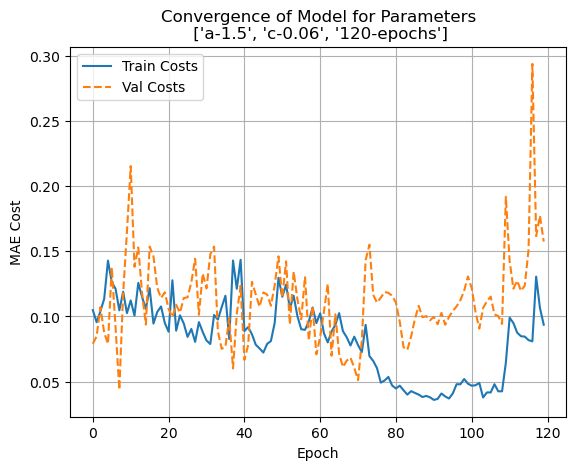

In [7]:
# Train Costs
train_files = glob.glob("data/GPU_training_mse/*TRAIN.csv")
train_costs, train_params = readfiles(train_files)
# Val Costs
val_files = glob.glob("data/GPU_training_mse/*VAL.csv")
val_costs, val_params = readfiles(val_files)
# Plot
for train_cost, val_cost, labels in zip(train_costs, val_costs, train_params,):
    fig, ax = plt.subplots(1)
    ax.plot(train_cost, label=f"Train Costs")
    ax.plot(val_cost, linestyle="--", label=f"Val Costs")
    ax.set_xlabel("Epoch")
    ax.set_ylabel("MAE Cost")
    ax.set_title(f"Convergence of Model for Parameters\n {labels}")
    plt.grid()
    plt.legend()
plt.show()